# Human resource
Sur base du dataset: https://drive.proton.me/urls/GGRQTP4NA8#9ilzDqjvg6DX
Selon le graphique ci-dessous:
 ![](https://scikit-learn.org/stable/_static/ml_map.png)
Disponible sur cette page: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Nous voulons travailler sur la colonne left:
Category -> labeled data => Classification  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0. Load dataset
### Import du DataFrame

In [2]:
hr = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr = pd.get_dummies(hr, columns=['Department', 'salary'])
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [4]:
def split_dataset(dataset, target_column):
    data = dataset.drop(columns=[target_column])
    target = dataset[target_column]
    return data, target
    

X: data (Majuscule car multiples colonnes)
y: target (Minuscule car colonne unique)
On passe par data.values et target.values pour l'indexation

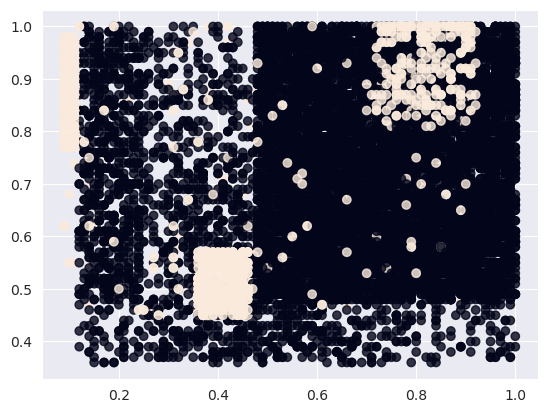

In [5]:
target = 'left'
data, target = split_dataset(hr, target)
X = data.values 
y = target.values
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## 1. Train Test Split

A présent que nous avons séparé le dataset en deux, nous devons nous assurer que les données soient mélangées

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (11999, 20)
Test set: (3000, 20)


Text(0.5, 1.0, 'Test set')

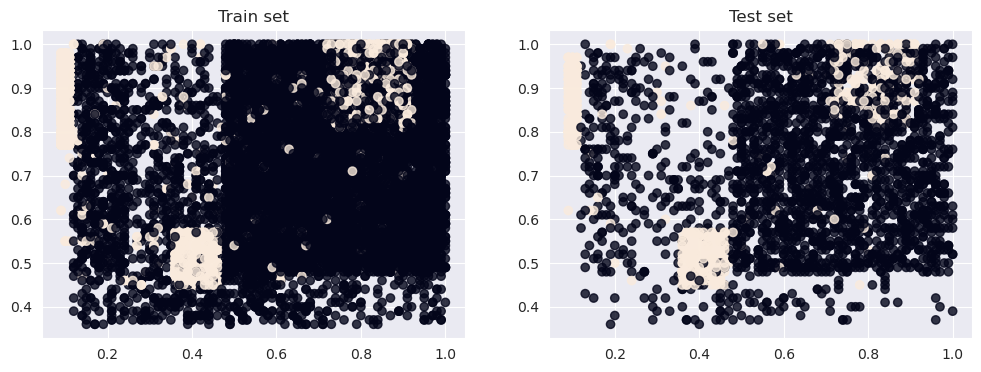

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121) # Disposition des graphiques en matrice [1,2] ordre: 1ère position
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8) # alpha:transparence des points [0à1], c: color, ici le fait de mettre y_train va faire que chaque valeur de y_train aura une couleur/nuance différente.
plt.title('Train set')
plt.subplot(122) # Disposition des graphiques en matrice [1,2] ordre: 2ème position
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9573333333333334


## 2. Validation Set et Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.93458333, 0.93041667, 0.94458333, 0.92416667, 0.93955815])

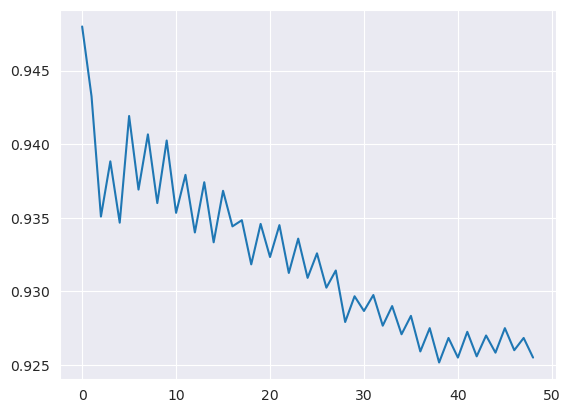

In [13]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# 3. Validation Curve

In [14]:
from sklearn.model_selection import validation_curve

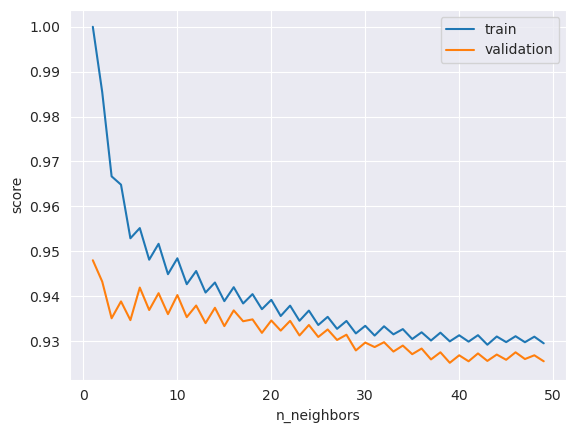

In [15]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5, scoring='accuracy')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.plot(k, val_score.mean(axis=1), label='validation')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [16]:
from sklearn.model_selection import learning_curve

In [17]:
# train_sizes
np.linspace(start=0.2, stop=1.0, num=5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [18]:
# train_sizes => quantite de donnees a entrer par petite quantite
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.2, 1.0, num=5), cv = 5 )

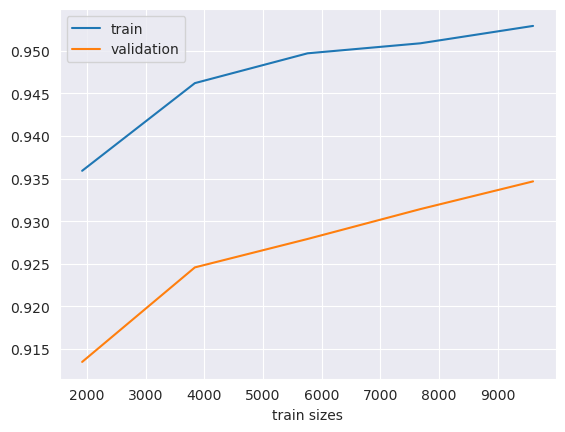

In [19]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

In [20]:
print(train_score)

[[0.93173528 0.93694633 0.93694633 0.93694633 0.93694633]
 [0.94634019 0.94634019 0.94607971 0.94607971 0.94607971]
 [0.94929675 0.94894947 0.94947039 0.9503386  0.9503386 ]
 [0.95038416 0.95051439 0.95103529 0.95168642 0.95064462]
 [0.95322429 0.95384936 0.95207834 0.95343265 0.95186999]]


In [21]:
print(val_score)

[[0.90208333 0.91625    0.92083333 0.91166667 0.91663193]
 [0.92083333 0.9225     0.93208333 0.92       0.92746978]
 [0.92833333 0.9225     0.93708333 0.92208333 0.92955398]
 [0.93291667 0.92375    0.94083333 0.92208333 0.93747395]
 [0.93458333 0.93041667 0.94458333 0.92416667 0.93955815]]


## 4. GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'metric': ['euclidean', 'manhattan'],
    'leaf_size' : np.arange(1, 40)
    }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
model.score(X_test, y_test)

In [ ]:
model_KNN_best = KNeighborsClassifier(leaf_size= 1, metric= 'euclidean', n_neighbors= 5)

In [ ]:
model_KNN_best.fit(X_train, y_train)

In [ ]:
import joblib

joblib.dump(model_KNN_best, "best_model.pkl")

## 5. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
conf_mat = confusion_matrix(y_test, model.predict(X_test))
conf_mat

In [ ]:
import seaborn as sns
sns.heatmap(conf_mat,cmap="YlGnBu", annot=True)

In [ ]:
print(f'precision : {precision_score(y_test, model.predict(X_test), average = "micro")}')

print(f' recall : {recall_score(y_test, model.predict(X_test), average = "macro")}')
print(f' f1 : {f1_score(y_test, model.predict(X_test), average = "weighted")}')

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

In [ ]:
## 6. Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()